In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

## Data Collection and Preprocessing

In [110]:
df=pd.read_csv('loans.csv')

In [111]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [112]:
df.shape

(614, 13)

In [113]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [114]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [115]:
df.interpolate(method='linear', inplace=True)


<ipython-input-115-a83f336b1194>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [116]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,1
Loan_Amount_Term,0


In [117]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

<ipython-input-117-90613879d37d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


In [118]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

<ipython-input-118-d3b1bb51508f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Married'].fillna(df['Married'].mode()[0], inplace=True)


In [119]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

<ipython-input-119-ff7bb676ed6c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


In [120]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

<ipython-input-120-9efd06336c1f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)


In [121]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,1
Loan_Amount_Term,0


In [122]:
df=df.dropna()

In [123]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [124]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [125]:
# label encoding
df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

<ipython-input-125-fd55fff36a47>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)


In [126]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [127]:
df['Dependents'].value_counts()

,count
Dependents,
0,359
1,102
2,101
3+,51


In [128]:
# Replcae 3+ with 4
df=df.replace(to_replace='3+',value=4)

In [129]:
df['Dependents'].value_counts()

,count
Dependents,
0,359
1,102
2,101
4,51


## Data Visualization

<Axes: xlabel='Education', ylabel='count'>

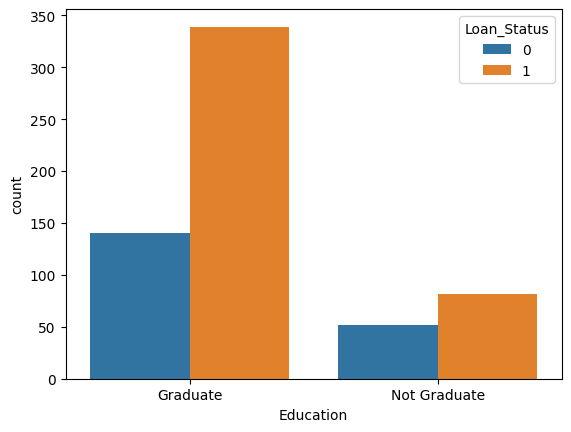

In [130]:
#Education vs Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=df)

<Axes: xlabel='Married', ylabel='count'>

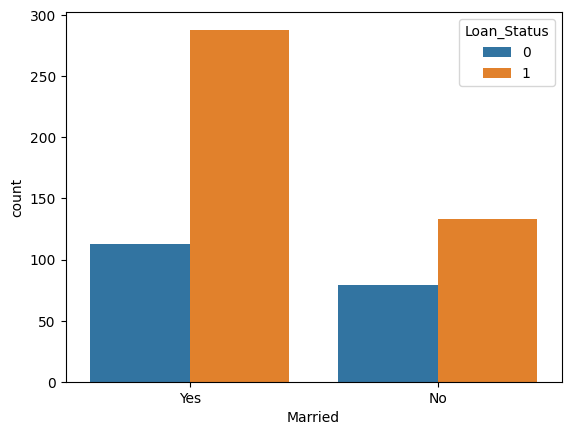

In [131]:
# Maritial Status vs Loan-status

sns.countplot(x='Married',hue='Loan_Status',data=df)

In [132]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

<ipython-input-132-d220f740e670>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)


In [133]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [134]:
X=df.drop(columns=['Loan_ID','Loan_Status'],axis=1)

In [135]:
Y=df['Loan_Status']

In [136]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,4,1,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,2


In [137]:
Y

,Loan_Status
1,0
2,1
3,1
4,1
5,1
...,...
609,1
610,1
611,1
612,1


In [138]:
# Train Test Split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [139]:
print(X_train.shape,X_test.shape)

(551, 11) (62, 11)


In [140]:
# Model - Support Vector Machaine Model

In [141]:
classifier=svm.SVC(kernel='linear')

In [142]:
#training

classifier.fit(X_train,Y_train)

SVC(kernel='linear')

## Model Evaluation

In [143]:
# check accuracy Scores

X_train_pred=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_pred,Y_train)

In [144]:
print(training_data_accuracy)

0.8039927404718693


In [145]:
X_test_pred=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred,Y_test)

In [146]:
print(test_data_accuracy)

0.8225806451612904


In [147]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on the training dataset
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
training_data_precision = precision_score(Y_train, X_train_pred, average='binary')  # Adjust average for multiclass
training_data_recall = recall_score(Y_train, X_train_pred, average='binary')
training_data_f1 = f1_score(Y_train, X_train_pred, average='binary')

# Print training metrics
print("Training Data Metrics:")
print(f"Accuracy: {training_data_accuracy:.2f}")
print(f"Precision: {training_data_precision:.2f}")
print(f"Recall: {training_data_recall:.2f}")
print(f"F1 Score: {training_data_f1:.2f}")
print("\nDetailed Training Classification Report:")
print(classification_report(Y_train, X_train_pred))

# Evaluate the model on the testing dataset
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
test_data_precision = precision_score(Y_test, X_test_pred, average='binary')  # Adjust average for multiclass
test_data_recall = recall_score(Y_test, X_test_pred, average='binary')
test_data_f1 = f1_score(Y_test, X_test_pred, average='binary')

# Print testing metrics
print("\nTesting Data Metrics:")
print(f"Accuracy: {test_data_accuracy:.2f}")
print(f"Precision: {test_data_precision:.2f}")
print(f"Recall: {test_data_recall:.2f}")
print(f"F1 Score: {test_data_f1:.2f}")
print("\nDetailed Testing Classification Report:")
print(classification_report(Y_test, X_test_pred))

# Document model performance
print("\nPerformance Summary:")
print(f"Training Accuracy: {training_data_accuracy:.2f}, Testing Accuracy: {test_data_accuracy:.2f}")
print("Observations:")
if training_data_accuracy > test_data_accuracy:
    print("The model might be overfitting as it performs better on training data than testing data.")
elif training_data_accuracy < test_data_accuracy:
    print("The model might be underfitting or over-generalizing.")
else:
    print("The model shows consistent performance across training and testing datasets.")


Training Data Metrics:
Accuracy: 0.80
Precision: 0.79
Recall: 0.96
F1 Score: 0.87

Detailed Training Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.46      0.59       173
           1       0.79      0.96      0.87       378

    accuracy                           0.80       551
   macro avg       0.82      0.71      0.73       551
weighted avg       0.81      0.80      0.78       551


Testing Data Metrics:
Accuracy: 0.82
Precision: 0.81
Recall: 0.98
F1 Score: 0.88

Detailed Testing Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.47      0.62        19
           1       0.81      0.98      0.88        43

    accuracy                           0.82        62
   macro avg       0.85      0.73      0.75        62
weighted avg       0.84      0.82      0.80        62


Performance Summary:
Training Accuracy: 0.80, Testing Accuracy: 0.82
Observations:
The model might

In [148]:
import pickle

In [149]:
filename = 'loan_status_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [150]:

classifier = RandomForestClassifier(random_state=2)
classifier.fit(X_train, Y_train)
# Random Forest Model
X_train_pred = classifier.predict(X_train)
X_training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print(f"Random Forest - Training Data Accuracy: {X_training_data_accuracy}")

X_test_pred = classifier.predict(X_test)
X_test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print(f"Random Forest - Test Data Accuracy: {X_test_data_accuracy}")

# Saving the Random Forest model
X_filename = 'loan_status_rf_model.pkl'
pickle.dump(classifier, open(X_filename, 'wb'))

Random Forest - Training Data Accuracy: 1.0
Random Forest - Test Data Accuracy: 0.7903225806451613


In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on the training dataset
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
training_data_precision = precision_score(Y_train, X_train_pred, average='binary')  # Adjust average for multiclass
training_data_recall = recall_score(Y_train, X_train_pred, average='binary')
training_data_f1 = f1_score(Y_train, X_train_pred, average='binary')

# Print training metrics
print("Training Data Metrics:")
print(f"Accuracy: {training_data_accuracy:.2f}")
print(f"Precision: {training_data_precision:.2f}")
print(f"Recall: {training_data_recall:.2f}")
print(f"F1 Score: {training_data_f1:.2f}")
print("\nDetailed Training Classification Report:")
print(classification_report(Y_train, X_train_pred))

# Evaluate the model on the testing dataset
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
test_data_precision = precision_score(Y_test, X_test_pred, average='binary')  # Adjust average for multiclass
test_data_recall = recall_score(Y_test, X_test_pred, average='binary')
test_data_f1 = f1_score(Y_test, X_test_pred, average='binary')

# Print testing metrics
print("\nTesting Data Metrics:")
print(f"Accuracy: {test_data_accuracy:.2f}")
print(f"Precision: {test_data_precision:.2f}")
print(f"Recall: {test_data_recall:.2f}")
print(f"F1 Score: {test_data_f1:.2f}")
print("\nDetailed Testing Classification Report:")
print(classification_report(Y_test, X_test_pred))

# Document model performance
print("\nPerformance Summary:")
print(f"Training Accuracy: {training_data_accuracy:.2f}, Testing Accuracy: {test_data_accuracy:.2f}")
print("Observations:")
if training_data_accuracy > test_data_accuracy:
    print("The model might be overfitting as it performs better on training data than testing data.")
elif training_data_accuracy < test_data_accuracy:
    print("The model might be underfitting or over-generalizing.")
else:
    print("The model shows consistent performance across training and testing datasets.")


Training Data Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Detailed Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       378

    accuracy                           1.00       551
   macro avg       1.00      1.00      1.00       551
weighted avg       1.00      1.00      1.00       551


Testing Data Metrics:
Accuracy: 0.79
Precision: 0.81
Recall: 0.91
F1 Score: 0.86

Detailed Testing Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.53      0.61        19
           1       0.81      0.91      0.86        43

    accuracy                           0.79        62
   macro avg       0.76      0.72      0.73        62
weighted avg       0.78      0.79      0.78        62


Performance Summary:
Training Accuracy: 1.00, Testing Accuracy: 0.79
Observations:
The model might

In [158]:
from xgboost import XGBClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pickle

# Initialize the XGBoost classifier with support for categorical dat
# Fit the model
classifier.fit(X_train, Y_train)

# XGBoost Accuracy
X_train_pred = classifier.predict(X_train)
X_training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print(f"XGBoost - Training Data Accuracy: {X_training_data_accuracy}")

X_test_pred = classifier.predict(X_test)
X_test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print(f"XGBoost - Test Data Accuracy: {X_test_data_accuracy}")

# Save XGBoost Model
xgb_filename = 'loan_status_xgb_model.pkl'
pickle.dump(classifier, open(xgb_filename, 'wb'))



XGBoost - Training Data Accuracy: 0.8457350272232305
XGBoost - Test Data Accuracy: 0.8387096774193549


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on the training dataset
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
training_data_precision = precision_score(Y_train, X_train_pred, average='binary')  # Adjust average for multiclass
training_data_recall = recall_score(Y_train, X_train_pred, average='binary')
training_data_f1 = f1_score(Y_train, X_train_pred, average='binary')

# Print training metrics
print("Training Data Metrics:")
print(f"Accuracy: {training_data_accuracy:.2f}")
print(f"Precision: {training_data_precision:.2f}")
print(f"Recall: {training_data_recall:.2f}")
print(f"F1 Score: {training_data_f1:.2f}")
print("\nDetailed Training Classification Report:")
print(classification_report(Y_train, X_train_pred))

# Evaluate the model on the testing dataset
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
test_data_precision = precision_score(Y_test, X_test_pred, average='binary')  # Adjust average for multiclass
test_data_recall = recall_score(Y_test, X_test_pred, average='binary')
test_data_f1 = f1_score(Y_test, X_test_pred, average='binary')

# Print testing metrics
print("\nTesting Data Metrics:")
print(f"Accuracy: {test_data_accuracy:.2f}")
print(f"Precision: {test_data_precision:.2f}")
print(f"Recall: {test_data_recall:.2f}")
print(f"F1 Score: {test_data_f1:.2f}")
print("\nDetailed Testing Classification Report:")
print(classification_report(Y_test, X_test_pred))

# Document model performance
print("\nPerformance Summary:")
print(f"Training Accuracy: {training_data_accuracy:.2f}, Testing Accuracy: {test_data_accuracy:.2f}")
print("Observations:")
if training_data_accuracy > test_data_accuracy:
    print("The model might be overfitting as it performs better on training data than testing data.")
elif training_data_accuracy < test_data_accuracy:
    print("The model might be underfitting or over-generalizing.")
else:
    print("The model shows consistent performance across training and testing datasets.")

Training Data Metrics:
Accuracy: 0.85
Precision: 0.84
Recall: 0.97
F1 Score: 0.90

Detailed Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.58      0.70       173
           1       0.84      0.97      0.90       378

    accuracy                           0.85       551
   macro avg       0.86      0.77      0.80       551
weighted avg       0.85      0.85      0.84       551


Testing Data Metrics:
Accuracy: 0.84
Precision: 0.82
Recall: 0.98
F1 Score: 0.89

Detailed Testing Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.82      0.98      0.89        43

    accuracy                           0.84        62
   macro avg       0.87      0.75      0.78        62
weighted avg       0.85      0.84      0.82        62


Performance Summary:
Training Accuracy: 0.85, Testing Accuracy: 0.84
Observations:
The model might

**Decision Tree Model**

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

# Decision Tree Model
classifier = DecisionTreeClassifier(random_state=2)
classifier.fit(X_train, Y_train)

# Decision Tree Accuracy
X_train_pred = classifier.predict(X_train)
X_training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print(f"Decision Tree - Training Data Accuracy: {X_training_data_accuracy}")

X_test_pred = classifier.predict(X_test)
X_test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print(f"Decision Tree - Test Data Accuracy: {X_test_data_accuracy}")

# Save Decision Tree Model
dt_filename = 'loan_status_dt_model.pkl'
pickle.dump(classifier, open(dt_filename, 'wb'))


Decision Tree - Training Data Accuracy: 1.0
Decision Tree - Test Data Accuracy: 0.7580645161290323


In [156]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on the training dataset
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
training_data_precision = precision_score(Y_train, X_train_pred, average='binary')  # Adjust average for multiclass
training_data_recall = recall_score(Y_train, X_train_pred, average='binary')
training_data_f1 = f1_score(Y_train, X_train_pred, average='binary')

# Print training metrics
print("Training Data Metrics:")
print(f"Accuracy: {training_data_accuracy:.2f}")
print(f"Precision: {training_data_precision:.2f}")
print(f"Recall: {training_data_recall:.2f}")
print(f"F1 Score: {training_data_f1:.2f}")
print("\nDetailed Training Classification Report:")
print(classification_report(Y_train, X_train_pred))

# Evaluate the model on the testing dataset
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
test_data_precision = precision_score(Y_test, X_test_pred, average='binary')  # Adjust average for multiclass
test_data_recall = recall_score(Y_test, X_test_pred, average='binary')
test_data_f1 = f1_score(Y_test, X_test_pred, average='binary')

# Print testing metrics
print("\nTesting Data Metrics:")
print(f"Accuracy: {test_data_accuracy:.2f}")
print(f"Precision: {test_data_precision:.2f}")
print(f"Recall: {test_data_recall:.2f}")
print(f"F1 Score: {test_data_f1:.2f}")
print("\nDetailed Testing Classification Report:")
print(classification_report(Y_test, X_test_pred))

# Document model performance
print("\nPerformance Summary:")
print(f"Training Accuracy: {training_data_accuracy:.2f}, Testing Accuracy: {test_data_accuracy:.2f}")
print("Observations:")
if training_data_accuracy > test_data_accuracy:
    print("The model might be overfitting as it performs better on training data than testing data.")
elif training_data_accuracy < test_data_accuracy:
    print("The model might be underfitting or over-generalizing.")
else:
    print("The model shows consistent performance across training and testing datasets.")

Training Data Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00

Detailed Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       173
           1       1.00      1.00      1.00       378

    accuracy                           1.00       551
   macro avg       1.00      1.00      1.00       551
weighted avg       1.00      1.00      1.00       551


Testing Data Metrics:
Accuracy: 0.76
Precision: 0.83
Recall: 0.81
F1 Score: 0.82

Detailed Testing Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.63      0.62        19
           1       0.83      0.81      0.82        43

    accuracy                           0.76        62
   macro avg       0.72      0.72      0.72        62
weighted avg       0.76      0.76      0.76        62


Performance Summary:
Training Accuracy: 1.00, Testing Accuracy: 0.76
Observations:
The model might

In [157]:
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.metrics import accuracy_score
# AdaBoost Model
classifier = AdaBoostClassifier(random_state=2)
classifier.fit(X_train, Y_train)

# AdaBoost Accuracy
X_train_pred = classifier.predict(X_train)
X_training_data_accuracy = accuracy_score(X_train_pred, Y_train)
print(f"AdaBoost - Training Data Accuracy: {X_training_data_accuracy}")

X_test_pred = classifier.predict(X_test)
X_test_data_accuracy = accuracy_score(X_test_pred, Y_test)
print(f"AdaBoost - Test Data Accuracy: {X_test_data_accuracy}")

# Save AdaBoost Model
ab_filename = 'loan_status_ab_model.pkl'
pickle.dump(classifier, open(ab_filename, 'wb'))

AdaBoost - Training Data Accuracy: 0.8457350272232305
AdaBoost - Test Data Accuracy: 0.8387096774193549


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Evaluate the model on the training dataset
X_train_pred = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, Y_train)
training_data_precision = precision_score(Y_train, X_train_pred, average='binary')  # Adjust average for multiclass
training_data_recall = recall_score(Y_train, X_train_pred, average='binary')
training_data_f1 = f1_score(Y_train, X_train_pred, average='binary')

# Print training metrics
print("Training Data Metrics:")
print(f"Accuracy: {training_data_accuracy:.2f}")
print(f"Precision: {training_data_precision:.2f}")
print(f"Recall: {training_data_recall:.2f}")
print(f"F1 Score: {training_data_f1:.2f}")
print("\nDetailed Training Classification Report:")
print(classification_report(Y_train, X_train_pred))

# Evaluate the model on the testing dataset
X_test_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, Y_test)
test_data_precision = precision_score(Y_test, X_test_pred, average='binary')  # Adjust average for multiclass
test_data_recall = recall_score(Y_test, X_test_pred, average='binary')
test_data_f1 = f1_score(Y_test, X_test_pred, average='binary')

# Print testing metrics
print("\nTesting Data Metrics:")
print(f"Accuracy: {test_data_accuracy:.2f}")
print(f"Precision: {test_data_precision:.2f}")
print(f"Recall: {test_data_recall:.2f}")
print(f"F1 Score: {test_data_f1:.2f}")
print("\nDetailed Testing Classification Report:")
print(classification_report(Y_test, X_test_pred))

# Document model performance
print("\nPerformance Summary:")
print(f"Training Accuracy: {training_data_accuracy:.2f}, Testing Accuracy: {test_data_accuracy:.2f}")
print("Observations:")
if training_data_accuracy > test_data_accuracy:
    print("The model might be overfitting as it performs better on training data than testing data.")
elif training_data_accuracy < test_data_accuracy:
    print("The model might be underfitting or over-generalizing.")
else:
    print("The model shows consistent performance across training and testing datasets.")

Training Data Metrics:
Accuracy: 0.85
Precision: 0.84
Recall: 0.97
F1 Score: 0.90

Detailed Training Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.58      0.70       173
           1       0.84      0.97      0.90       378

    accuracy                           0.85       551
   macro avg       0.86      0.77      0.80       551
weighted avg       0.85      0.85      0.84       551


Testing Data Metrics:
Accuracy: 0.84
Precision: 0.82
Recall: 0.98
F1 Score: 0.89

Detailed Testing Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.82      0.98      0.89        43

    accuracy                           0.84        62
   macro avg       0.87      0.75      0.78        62
weighted avg       0.85      0.84      0.82        62


Performance Summary:
Training Accuracy: 0.85, Testing Accuracy: 0.84
Observations:
The model might